<a href="https://colab.research.google.com/github/mkosaka1/Speech_Emotion_Recognition/blob/master/3.%20Transfer_Learning%20-%20Initial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

Confusion_matrix_concrete.jpg  drive/  sample_data/  sign_classifier.h5


In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
from IPython.display import Audio
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from keras.utils import to_categorical
from glob import glob
import cv2
from sklearn.utils import shuffle




# Labels

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): 
        if labels == 'angry': 
            label = 'angry'
        elif labels == 'calm':
            label = 'calm'
        elif labels == 'disgust':
            label = 'disgust'
        elif labels == 'fearful':
            label = 'fearful'
        elif labels == 'happy':
            label = 'happy'
        elif labels == 'neutral':
            label = 'neutral'
        elif labels == 'sad':
            label = 'sad'
        elif labels == 'surprised':
            label = 'surprised'
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(224,224)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            # image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=200) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {'angry':'angry', 'calm':'calm', 'disgust':'disgust', 'fearful':'fearful', 'happy':'happy', 'neutral':'neutral','sad':'sad','surprised':'surprised'}
    
    return labels[class_code]


In [ ]:
Images, Labels = get_images('/content/drive/My Drive/sorted_data/') #Extract the training images from the folders.

# Images = np.array(Images) #converting the list of images to numpy array.
# Labels = np.array(Labels)

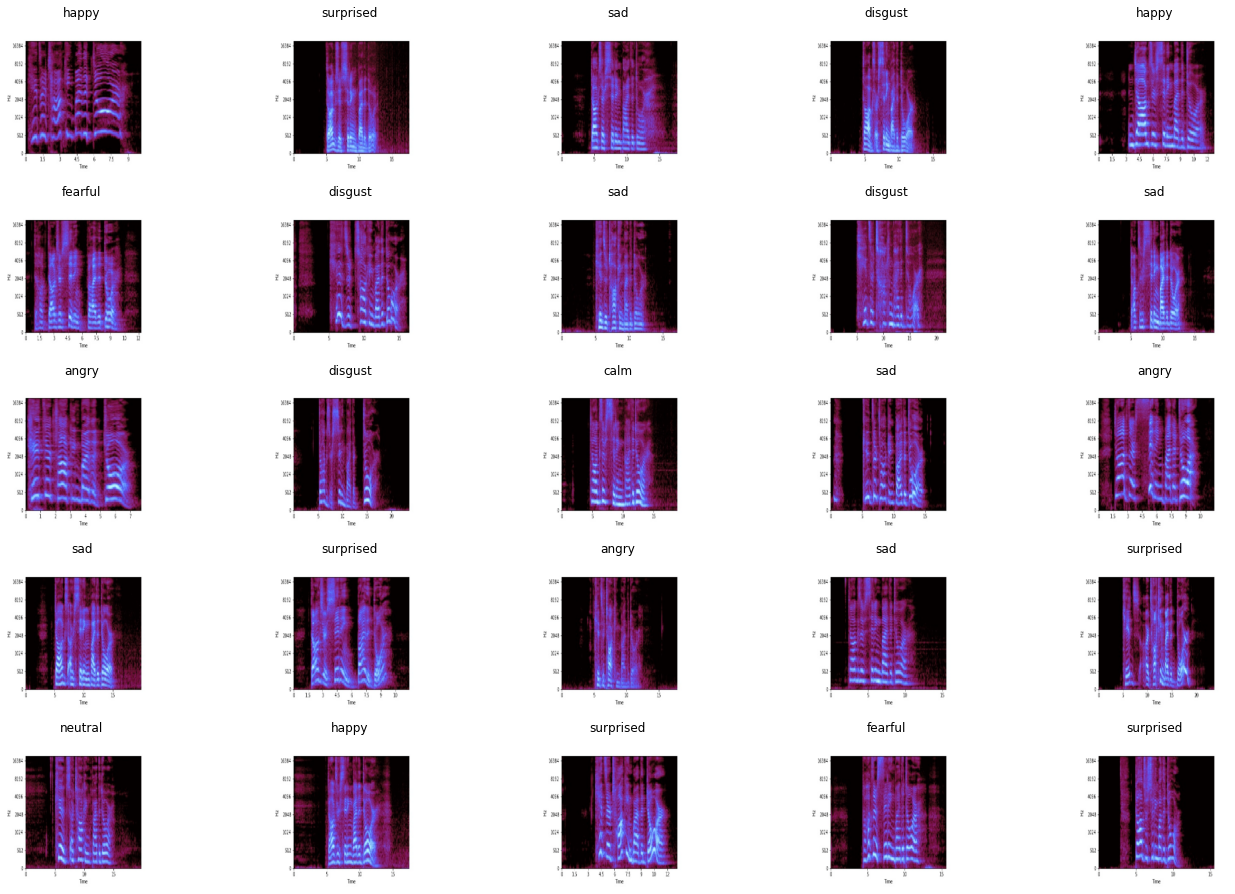

In [ ]:
from random import randint

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(Images, Labels, test_size=0.3,random_state=22, stratify=Labels)
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.3,random_state=22,stratify=y_model)


In [ ]:
# Images = np.array(Images) #converting the list of images to numpy array.
# Labels = np.array(Labels)

In [ ]:
from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

X_train=np.array(X_train)/255
# y_train = to_categorical(lb.fit_transform(y_train),num_classes=8)

X_test=np.array(X_test)/255
# y_test = to_categorical(lb.fit_transform(y_test),num_classes=8)

X_val=np.array(X_val)/255
# y_val = to_categorical(lb.fit_transform(y_val),num_classes=8)



y_val=np_utils.to_categorical(lb.fit_transform(y_val))
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
X_test.shape

(432, 224, 224, 3)

In [ ]:
X_train.shape

(705, 224, 224, 3)

In [ ]:
y_test.shape

(432, 8)

In [ ]:
X_train[90][50]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array(['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
       'surprised'], dtype='<U9')

# VGG16

Text(0.5, 1.0, 'Number of training images per category:')

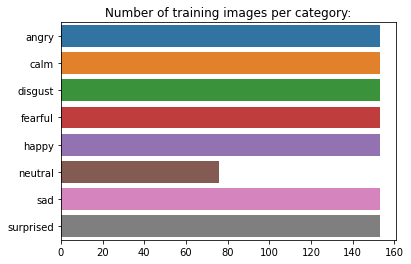

In [3]:
train_data_dir = "/content/drive/My Drive/logmel/train"
val_data_dir = "/content/drive/My Drive/logmel/validation"
test_data_dir = "/content/drive/My Drive/logmel/test"
category_names = sorted(os.listdir('/content/drive/My Drive/logmel/train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/My Drive/logmel/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [16]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

In [17]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f944c3f80b8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c3f8be0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c38f320> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f944c3f8908> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c4f7240> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c3f8b00> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f944c2bf240> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c523860> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c314ac8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c2a1b00> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f944c2a9e10> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f944c2a1

In [18]:
for layer in conv_base.layers[:-13]:
    layer.trainable = False

In [19]:
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.15))
# model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 8200      
Total params: 16,297,800
Trainable params: 16,037,640
Non-trainable params: 260,160
____________________________________

In [20]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 1

# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 1147 images belonging to 8 classes.
Total number of images for "validation":
Found 150 images belonging to 8 classes.
Total number of images for "testing":
Found 143 images belonging to 8 classes.


In [21]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 20
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [22]:
history = model.fit_generator(train_generator, 
                              epochs=epochs,
                              steps_per_epoch=len(train_generator)//batch_size,
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint],
                              )

Epoch 1/20
1147/1147 [==============================] - ETA: 0s - loss: 3.1803 - acc: 0.1194
Epoch 00001: val_acc improved from -inf to 0.13333, saving model to sign_classifier.h5
1147/1147 [==============================] - 33s 29ms/step - loss: 3.1803 - acc: 0.1194 - val_loss: 2.8734 - val_acc: 0.1333
Epoch 2/20
1147/1147 [==============================] - ETA: 0s - loss: 2.7750 - acc: 0.1282
Epoch 00002: val_acc did not improve from 0.13333
1147/1147 [==============================] - 33s 29ms/step - loss: 2.7750 - acc: 0.1282 - val_loss: 2.6915 - val_acc: 0.1333
Epoch 3/20
1147/1147 [==============================] - ETA: 0s - loss: 2.6263 - acc: 0.1221
Epoch 00003: val_acc did not improve from 0.13333
1147/1147 [==============================] - 32s 28ms/step - loss: 2.6263 - acc: 0.1221 - val_loss: 2.5588 - val_acc: 0.1333
Epoch 4/20
1147/1147 [==============================] - ETA: 0s - loss: 2.5119 - acc: 0.1308
Epoch 00004: val_acc did not improve from 0.13333
1147/1147 [=====

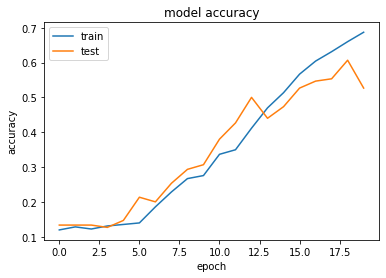

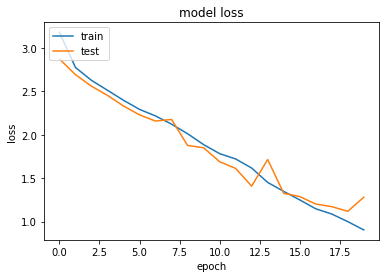

In [23]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [24]:
model = models.load_model("sign_classifier.h5")


In [25]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

Confusion matrix, without normalization


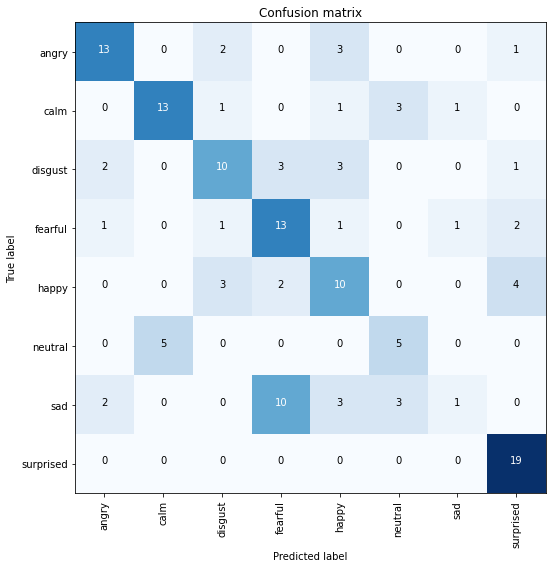

In [26]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [15]:
accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 53.1% 


# VGG 16 Image Augmentation

In [27]:
batch_size = 1

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=False,
        brightness_range = (0.9,1.1),
        fill_mode='nearest'
        )

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data

train_aug = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
save_to_dir='/content/drive/My Drive/augm_images', 
save_prefix='aug', 
save_format='jpg',
class_mode = "categorical")

Found 1147 images belonging to 8 classes.


In [28]:
learning_rate = 5e-5
epochs = 30
checkpoint = ModelCheckpoint("sign_classifier_augm.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate, clipnorm=1.), metrics = ['acc'])
history = model.fit_generator(train_aug, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint]
                              )

Epoch 1/30
1147/1147 [==============================] - ETA: 0s - loss: 1.7625 - acc: 0.4708
Epoch 00001: val_acc improved from -inf to 0.59333, saving model to sign_classifier_augm.h5
1147/1147 [==============================] - 50s 43ms/step - loss: 1.7625 - acc: 0.4708 - val_loss: 1.4404 - val_acc: 0.5933
Epoch 2/30
1147/1147 [==============================] - ETA: 0s - loss: 1.6937 - acc: 0.5336
Epoch 00002: val_acc improved from 0.59333 to 0.62667, saving model to sign_classifier_augm.h5
1147/1147 [==============================] - 50s 43ms/step - loss: 1.6937 - acc: 0.5336 - val_loss: 1.1435 - val_acc: 0.6267
Epoch 3/30
1146/1147 [============================>.] - ETA: 0s - loss: 1.6423 - acc: 0.5471
Epoch 00003: val_acc did not improve from 0.62667
1147/1147 [==============================] - 49s 43ms/step - loss: 1.6409 - acc: 0.5475 - val_loss: 1.6509 - val_acc: 0.5733
Epoch 4/30
1147/1147 [==============================] - ETA: 0s - loss: 1.5722 - acc: 0.5371
Epoch 00004: val

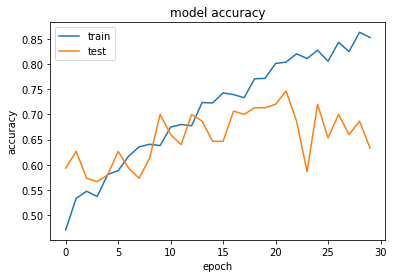

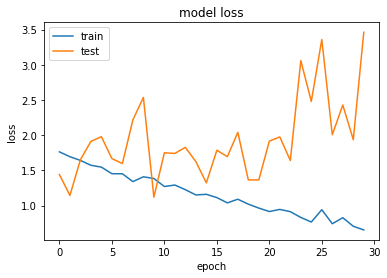

In [29]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

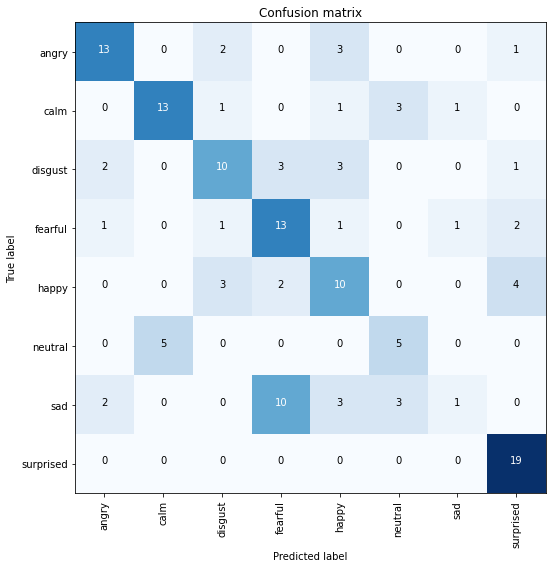

In [30]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

# Inception

In [31]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D


imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False,pooling='avg', input_shape=(224,224,3))

87916544/87910968 [==============================] - 1s 0us/step


In [32]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 1
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 1147 images belonging to 8 classes.
Total number of images for "validation":
Found 150 images belonging to 8 classes.
Total number of images for "testing":
Found 143 images belonging to 8 classes.


In [33]:
for layer in imagenet.layers:
    layer.trainable=False

In [34]:
from tensorflow.python.keras import layers, models, Model, optimizers
model = models.Sequential()
model.add(imagenet)
model.add(layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(nb_categories, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 8200      
Total params: 23,909,160
Trainable params: 2,106,376
Non-trainable params: 21,802,784
_________________________________________________________________


In [35]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 20
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [36]:
history = model.fit_generator(train_generator, 
                              epochs=epochs, 
                              shuffle=True, 
                              validation_data=val_generator,
                              )

Epoch 1/20
1147/1147 [==============================] - 20s 17ms/step - loss: 3.2145 - acc: 0.2432 - val_loss: 2.7147 - val_acc: 0.4533
Epoch 2/20
1147/1147 [==============================] - 19s 16ms/step - loss: 2.7239 - acc: 0.3915 - val_loss: 2.5663 - val_acc: 0.4133
Epoch 3/20
1147/1147 [==============================] - 19s 16ms/step - loss: 2.4991 - acc: 0.4621 - val_loss: 2.3848 - val_acc: 0.4533
Epoch 4/20
1147/1147 [==============================] - 18s 16ms/step - loss: 2.3765 - acc: 0.4603 - val_loss: 2.3169 - val_acc: 0.4067
Epoch 5/20
1147/1147 [==============================] - 19s 16ms/step - loss: 2.2116 - acc: 0.5022 - val_loss: 2.1269 - val_acc: 0.4867
Epoch 6/20
1147/1147 [==============================] - 19s 16ms/step - loss: 2.0682 - acc: 0.5440 - val_loss: 2.1277 - val_acc: 0.5000
Epoch 7/20
1147/1147 [==============================] - 19s 16ms/step - loss: 1.9658 - acc: 0.5606 - val_loss: 2.0483 - val_acc: 0.5400
Epoch 8/20
1147/1147 [==========================

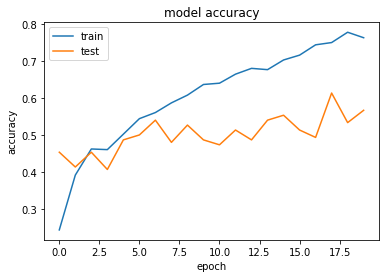

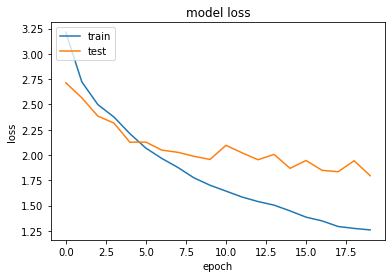

In [37]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

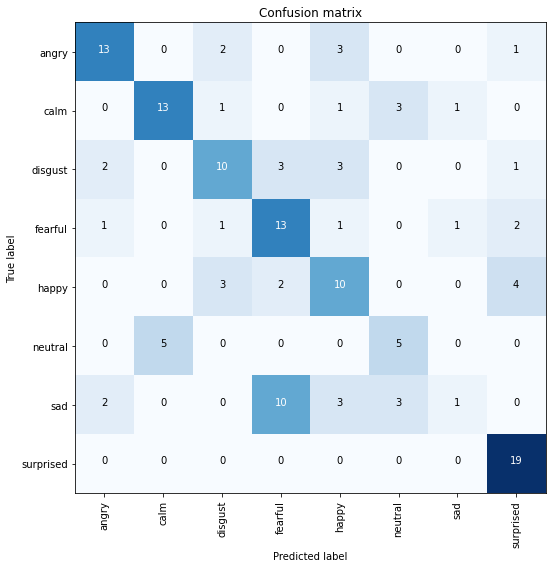

In [38]:
 import numpy as np
 import matplotlib.pyplot as plt
 import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = category_names
normalize=False
figname = 'Confusion_matrix_concrete.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
  horizontalalignment="center",
  color="white" if cm[i, j] > thresh else "black")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.tight_layout()
  plt.savefig(figname)

In [48]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, classes = category_names, title='Confusion Matrix', normalize=False
                      , figname = 'Confusion_matrix_concrete.jpg')

Confusion matrix, without normalization


#VGG19

In [46]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
img_height, img_width = 224,224
conv_base = vgg19.VGG19(weights='imagenet', pooling='avg', include_top=False, input_shape = (img_width, img_height, 3))

In [47]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f943b55ecf8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b55edd8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b55ed30> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f94382b5710> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b4acbe0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b55ec18> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f943b464470> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b464160> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b4f0518> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b46f438> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f943b46f278> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f943b401

In [48]:
for layer in conv_base.layers[:-16]:
    layer.trainable = False

In [49]:
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(conv_base)
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 8200      
Total params: 20,557,896
Trainable params: 20,297,736
Non-trainable params: 260,160
_________________________________________________________________


In [50]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img

#Number of images to load at each iteration
batch_size = 1

# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 1147 images belonging to 8 classes.
Total number of images for "validation":
Found 150 images belonging to 8 classes.
Total number of images for "testing":
Found 143 images belonging to 8 classes.


In [51]:
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

learning_rate = 5e-5
epochs = 40
checkpoint = ModelCheckpoint("sign_classifier.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics = ['acc'])

In [52]:
history = model.fit_generator(train_generator, 
                              epochs=epochs,
                              steps_per_epoch=len(train_generator)//batch_size,
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint],
                              )

Epoch 1/40
1146/1147 [============================>.] - ETA: 0s - loss: 2.4751 - acc: 0.1431
Epoch 00001: val_acc improved from -inf to 0.13333, saving model to sign_classifier.h5
1147/1147 [==============================] - 44s 39ms/step - loss: 2.4753 - acc: 0.1430 - val_loss: 2.3319 - val_acc: 0.1333
Epoch 2/40
1147/1147 [==============================] - ETA: 0s - loss: 2.2488 - acc: 0.1395
Epoch 00002: val_acc did not improve from 0.13333
1147/1147 [==============================] - 42s 37ms/step - loss: 2.2488 - acc: 0.1395 - val_loss: 2.2042 - val_acc: 0.1333
Epoch 3/40
1147/1147 [==============================] - ETA: 0s - loss: 2.1883 - acc: 0.1107
Epoch 00003: val_acc did not improve from 0.13333
1147/1147 [==============================] - 42s 37ms/step - loss: 2.1883 - acc: 0.1107 - val_loss: 2.1644 - val_acc: 0.1333
Epoch 4/40
1147/1147 [==============================] - ETA: 0s - loss: 2.1474 - acc: 0.1264
Epoch 00004: val_acc did not improve from 0.13333
1147/1147 [=====

In [44]:
history = model.fit_generator(train_generator, 
                              epochs=epochs,
                              steps_per_epoch=len(train_generator)//batch_size,
                              shuffle=True, 
                              validation_data=val_generator,
                              callbacks=[checkpoint],
                              )

Epoch 1/40
1147/1147 [==============================] - ETA: 0s - loss: 2.5243 - acc: 0.1473
Epoch 00001: val_acc improved from -inf to 0.13333, saving model to sign_classifier.h5
1147/1147 [==============================] - 45s 39ms/step - loss: 2.5243 - acc: 0.1473 - val_loss: 2.3653 - val_acc: 0.1333
Epoch 2/40
1147/1147 [==============================] - ETA: 0s - loss: 2.3187 - acc: 0.1351
Epoch 00002: val_acc did not improve from 0.13333
1147/1147 [==============================] - 43s 38ms/step - loss: 2.3187 - acc: 0.1351 - val_loss: 2.2737 - val_acc: 0.1333
Epoch 3/40
1147/1147 [==============================] - ETA: 0s - loss: 2.2532 - acc: 0.1273
Epoch 00003: val_acc did not improve from 0.13333
1147/1147 [==============================] - 44s 38ms/step - loss: 2.2532 - acc: 0.1273 - val_loss: 2.2142 - val_acc: 0.1333
Epoch 4/40
1147/1147 [==============================] - ETA: 0s - loss: 2.2143 - acc: 0.1369
Epoch 00004: val_acc did not improve from 0.13333
1147/1147 [=====

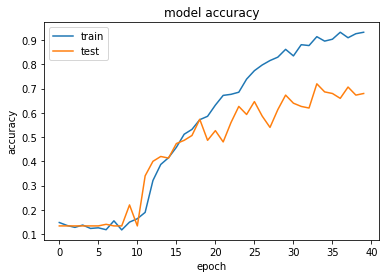

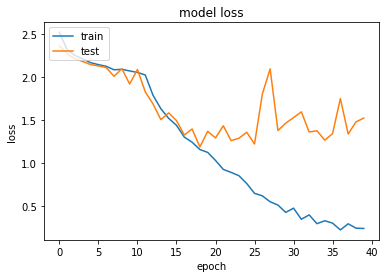

In [45]:
# PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()